# [Convolutions for Computer Vision](https://www.kaggle.com/dansbecker/exercise-convolutions-for-computer-vision/notebook)

To build and test your intuition for convolutions, you will designa vertical line detector.  
We'll apply that detector to each part of an image to create a new tensor showing where vertical lines are located.  
The information in this tutorial will be useful in the [ImageNet Challenges](https://www.kaggle.com/c/imagenet-object-localization-challenge).

   ![convolutions.png](img/convolutions.png)

In [1]:
import sys
from packages.learntools.deep_learning.exercise_1 import load_my_image, apply_conv_to_image, show, print_hints

## Example Convolution: Horizontal Line Detector

In [2]:
# Detects light vs. dark pixels:
horizontal_line_conv = [[1, 1],
                        [-1, -1]]

## Vertical Line Detector

In [3]:
vertical_line_conv = [[-1, -1], 
                      [1, 1]]

Now create a list that contains your convolutions, then apply them to the image data:

Original Image: 


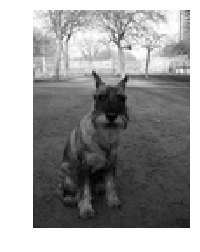

In [4]:
conv_list = [horizontal_line_conv, vertical_line_conv]

original_image = load_my_image()
print("Original Image: ")
show(original_image)

Let's see the image with just the horizontal and vertical line filters:

----------------------------
Filter: 
[[ 1  1]
 [-1 -1]]


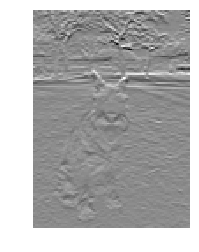

----------------------------
Filter: 
[[-1 -1]
 [ 1  1]]


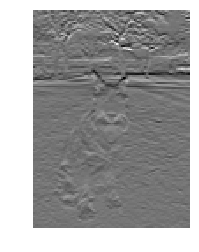

In [5]:
for conv in conv_list:
    filtered_image = apply_conv_to_image(conv, original_image)
    show(filtered_image)

## [Building Models from Convolutions](https://www.kaggle.com/dansbecker/building-models-from-convolutions)

This section describes how convolutions are combined in a way that enables computer vision.  
At the end of this lesson, you will be able to write TensorFlow and Keras code to use one of the best models in computer vision.

## [Programming in TensorFlow and Keras](https://www.kaggle.com/dansbecker/programming-in-tensorflow-and-keras)

**Choose the images to work with:**

In [6]:
from os.path import join

image_dir = 'data/dog_breed/train/'
img_paths = [join(image_dir, filename) for filename in
                    ['0246f44bb123ce3f91c939861eb97fb7.jpg',
                     '84728e78632c0910a69d33f82e62638c.jpg',
                     '8825e914555803f4c67b26593c9d5aff.jpg',
                     '91a5e8db15bccfb6cfa2df5e8b95ec03.jpg']]

**Write a function to read and prepare images for modeling:**

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size=224
def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    return preprocess_input(img_array)

/Users/benjamingrove/.pyenv/versions/3.6.1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


**Create a model with the pre-trained weights file and make predictions:**

In [8]:
from tensorflow.python.keras.applications import ResNet50

my_model = ResNet50(weights='inputs/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

### Visualization Time!

In [ ]:
import sys

# Add a directory with prefabricated code to your path.
sys.path.append('')